Step 1: Importing libraries

In this section, we import all the necessary libraries for the project. These libraries will allow us to perform various operations such as data manipulation, visualization, preprocessing, and building machine learning models.

In [1]:
# Import essential libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For basic data visualizations
import seaborn as sns  # For advanced and styled visualizations

# Import libraries for machine learning
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.ensemble import RandomForestClassifier  # Random Forest model
from sklearn.metrics import classification_report, confusion_matrix  # For model evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import TomekLinks


Step 2: Load the dataset

In this step, we load the dataset containing information about diabetes diagnosis and related features. We'll preview the first few rows to understand the structure and verify that the data has been loaded correctly

In [2]:
data=pd.read_csv(r'C:\Users\marco\Documents\DSTI\ML with python\Project 2\TAIPEI_diabetes.csv') # Load the dataset
print(data.head())  # Display the first 5 rows of the dataset


   PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0    1354778            0            171                      80   
1    1147438            8             92                      93   
2    1640031            7            115                      47   
3    1883350            9            103                      78   
4    1424119            1             85                      59   

   TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic  
0                34            23  43.509726          1.213191   21         0  
1                47            36  21.240576          0.158365   23         0  
2                52            35  41.511523          0.079019   23         0  
3                25           304  29.582192          1.282870   43         1  
4                27            35  42.604536          0.549542   22         0  


In [3]:
print(data.info())  # Display the summary of the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB
None


In [4]:
print(data.describe())  # Display the statistical summary of the dataset

          PatientID   Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
count  1.500000e+04  15000.000000   15000.000000            15000.000000   
mean   1.502922e+06      3.224533     107.856867               71.220667   
std    2.892534e+05      3.391020      31.981975               16.758716   
min    1.000038e+06      0.000000      44.000000               24.000000   
25%    1.252866e+06      0.000000      84.000000               58.000000   
50%    1.505508e+06      2.000000     104.000000               72.000000   
75%    1.755205e+06      6.000000     129.000000               85.000000   
max    1.999997e+06     14.000000     192.000000              117.000000   

       TricepsThickness  SerumInsulin           BMI  DiabetesPedigree  \
count      15000.000000  15000.000000  15000.000000      15000.000000   
mean          28.814000    137.852133     31.509646          0.398968   
std           14.555716    133.068252      9.759000          0.377944   
min            7.000000

Step 3 : 

(EDA) exploratory data analysis

Missing values per column:
PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64
Number of duplicate rows: 0


C:\Users\marco\AppData\Local\Temp\ipykernel_88132\4284096355.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Diabetic', palette='Set2')  # Visualize the distribution of the target


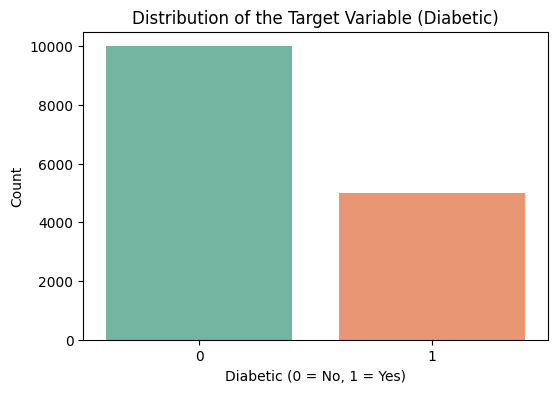

In [5]:

# Check for missing values in the dataset
print("Missing values per column:")
print(data.isnull().sum())  # Displays the count of missing values for each column

# Check for duplicates
print(f"Number of duplicate rows: {data.duplicated().sum()}")  # Counts duplicate rows

# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Diabetic', palette='Set2')  # Visualize the distribution of the target
plt.title("Distribution of the Target Variable (Diabetic)")
plt.xlabel("Diabetic (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


In [6]:
percentage = data['Diabetic'].value_counts(normalize=True) * 100  # Calculate the percentage of each class
print(f"Percentage of each class:\n{percentage}")  # Display the percentage of each class

Percentage of each class:
Diabetic
0    66.666667
1    33.333333
Name: proportion, dtype: float64


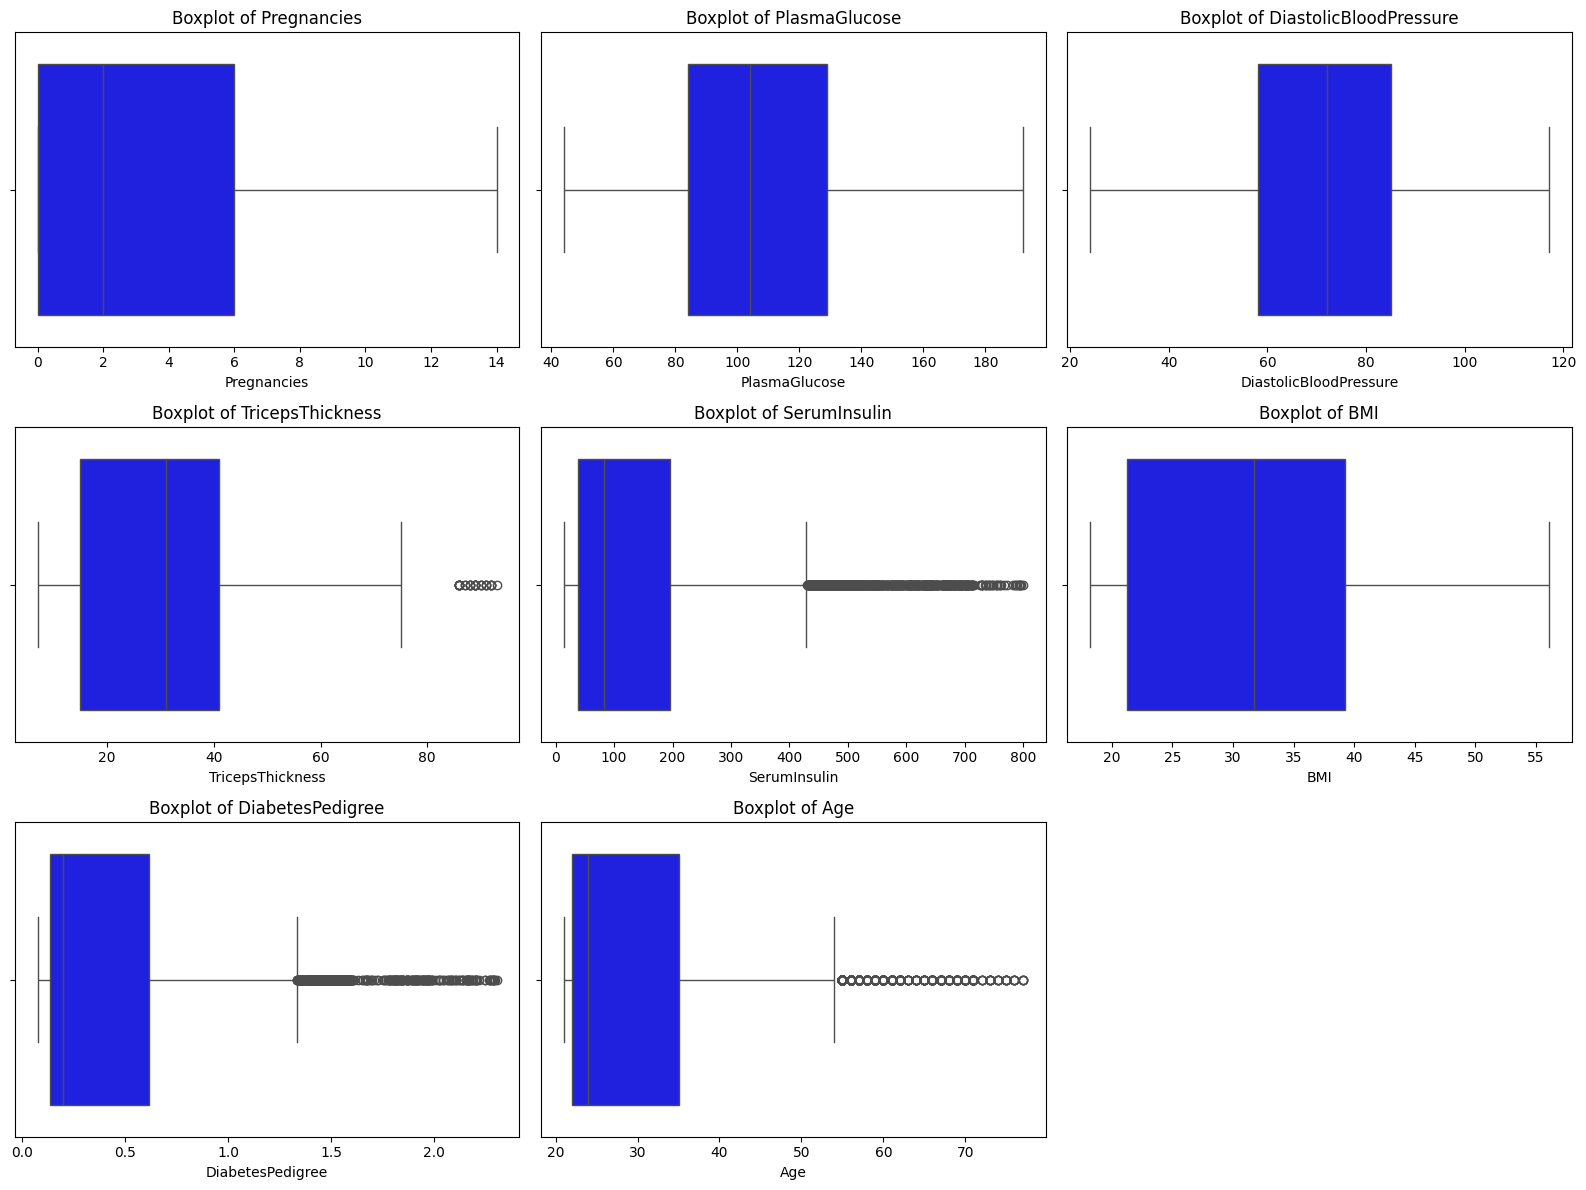

In [7]:
# Plot histograms for numerical features
numerical_features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 
                      'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']

plt.figure(figsize=(16, 12))  # Set the figure size

# Loop through each feature to plot
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)  # Create subplots (3 rows, 3 columns)
    sns.boxplot(data=data,x=feature, color='blue')  # Boxplot for the feature
    plt.title(f"Boxplot of {feature}")
    plt.xlabel(feature)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


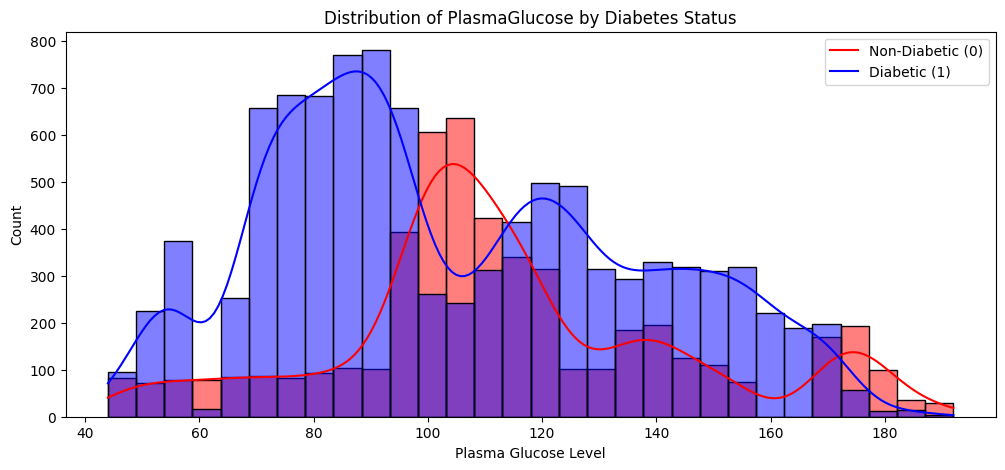

C:\Users\marco\AppData\Local\Temp\ipykernel_88132\3767986597.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Diabetic", y="PlasmaGlucose", data=data, palette=["blue", "red"])


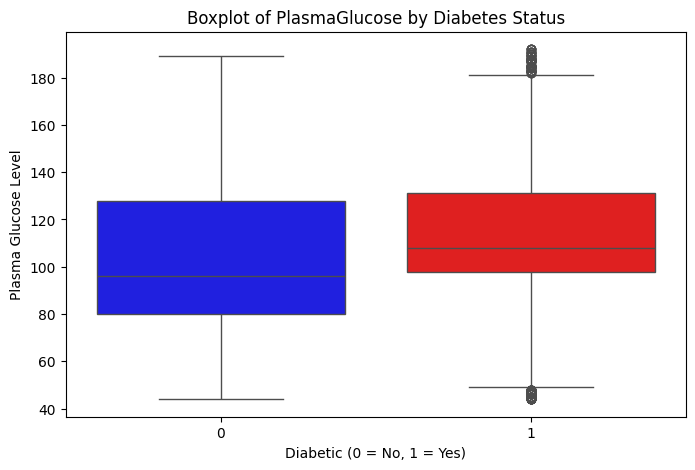

ModuleNotFoundError: No module named 'ace_tools'

In [42]:
plt.figure(figsize=(12, 5))

# Histogram con KDE
sns.histplot(data, x="PlasmaGlucose", hue="Diabetic", kde=True, bins=30, palette=["blue", "red"], alpha=0.5)
plt.title("Distribution of PlasmaGlucose by Diabetes Status")
plt.xlabel("Plasma Glucose Level")
plt.ylabel("Count")
plt.legend(["Non-Diabetic (0)", "Diabetic (1)"])
plt.show()

# Boxplot per mostrare la distribuzione statistica
plt.figure(figsize=(8, 5))
sns.boxplot(x="Diabetic", y="PlasmaGlucose", data=data, palette=["blue", "red"])
plt.title("Boxplot of PlasmaGlucose by Diabetes Status")
plt.xlabel("Diabetic (0 = No, 1 = Yes)")
plt.ylabel("Plasma Glucose Level")
plt.show()

# Statistiche descrittive per ciascun gruppo
stats_by_class = data.groupby("Diabetic")["PlasmaGlucose"].describe()
import ace_tools as tools
tools.display_dataframe_to_user(name="Plasma Glucose Statistics by Diabetes Status", dataframe=stats_by_class)

Analysis of the outliers

In [8]:
# Analysis outliers for the 'SerumInsulin' feature
Q1 = np.percentile(data['SerumInsulin'], 25)  # first quartile
Q3 = np.percentile(data['SerumInsulin'], 75)  # third quartile
IQR = Q3-Q1 #interquartile range

lower_bound = Q1 - 1.5*IQR  # lower bound
upper_bound = Q3 + 1.5*IQR  # upper bound
nb_outliers = len(data[(data['SerumInsulin'] < lower_bound) | (data['SerumInsulin'] > upper_bound)])  # number of outliers
percentage_outliers = nb_outliers / len(data) * 100  # percentage of outliers
print(f"Number of outliers: {nb_outliers}, Percentage of outliers: {round(percentage_outliers, 2)}%")

Number of outliers: 666, Percentage of outliers: 4.44%


In [9]:
#variance analysis
# Calculate the variance of each feature
variance = data.var()  # Calculate the variance of each feature
print("Variance of each feature:")  # Display the variance of each feature
print(variance)  # Display the variance of each feature

Variance of each feature:
PatientID                 8.366755e+10
Pregnancies               1.149902e+01
PlasmaGlucose             1.022847e+03
DiastolicBloodPressure    2.808546e+02
TricepsThickness          2.118689e+02
SerumInsulin              1.770716e+04
BMI                       9.523808e+01
DiabetesPedigree          1.428413e-01
Age                       1.461609e+02
Diabetic                  2.222370e-01
dtype: float64


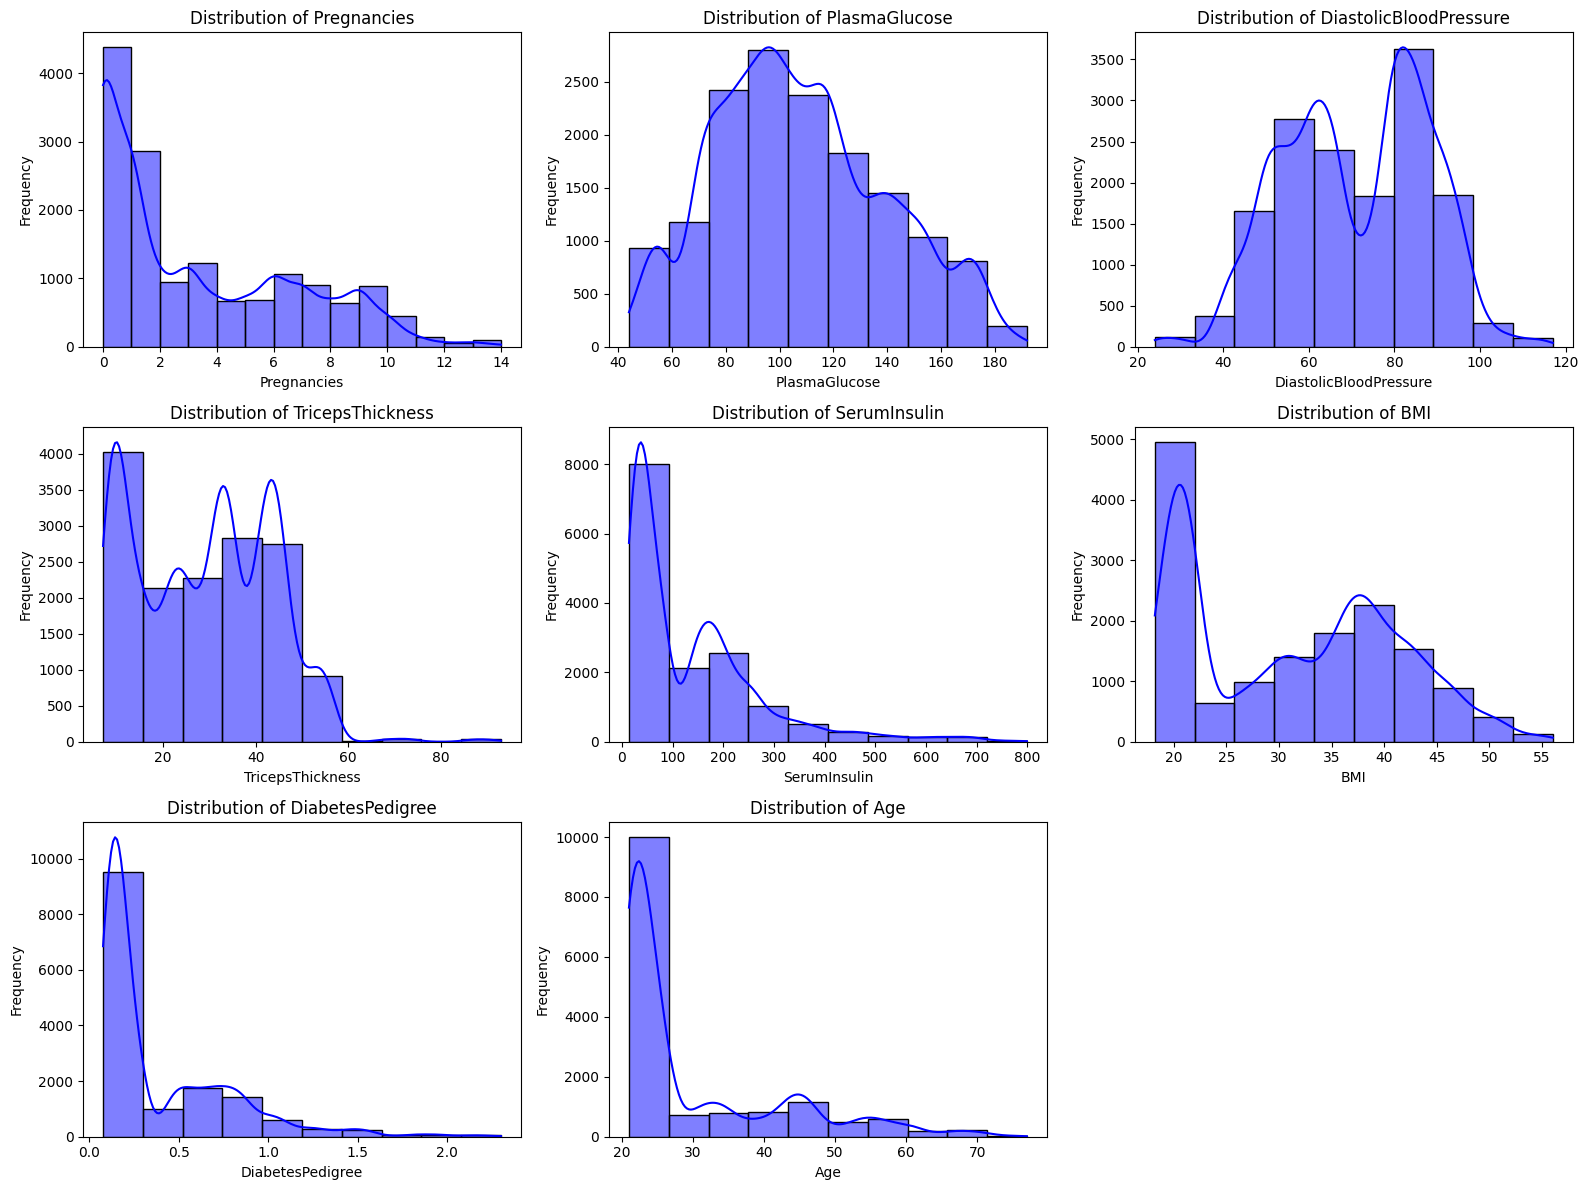

In [10]:
# Plot histograms for numerical features with custom bins
numerical_features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 
                      'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']
nb_bin_feature = [14, 10, 10, 10, 10, 10, 10, 10]  # Custom bin sizes for each feature

plt.figure(figsize=(16, 12))  # Set the figure size

# Loop through each feature and its corresponding bin size
for i, (feature, bins) in enumerate(zip(numerical_features, nb_bin_feature), 1):
    plt.subplot(3, 3, i)  # Create subplots (3 rows, 3 columns)
    sns.histplot(data[feature], kde=True, bins=bins, color='blue')  # Use custom bins
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


We will evaluate now ho many individuals shows Plasma glucose level above 200 mg/dL and are not classified as diabetics. Accordingly to https://www.ncbi.nlm.nih.gov/books/NBK532915/#:~:text=The%20results%20of%20the%20OGTT,200%20mg%2FdL%20indicates%20diabetes the normal range for a two-hours glucose test, blood sugar levels should be lower than 200 mg/dL. 

In [11]:
count = data[(data['Diabetic'] == 0) & (data['PlasmaGlucose'] > 200)].shape[0]
print(f"Number of individuals with PlasmaGlucose > 200 and not classified as diabetics: {count}")

Number of individuals with PlasmaGlucose > 200 and not classified as diabetics: 0


Text(0.5, 1.0, 'Correlation Heatmap')

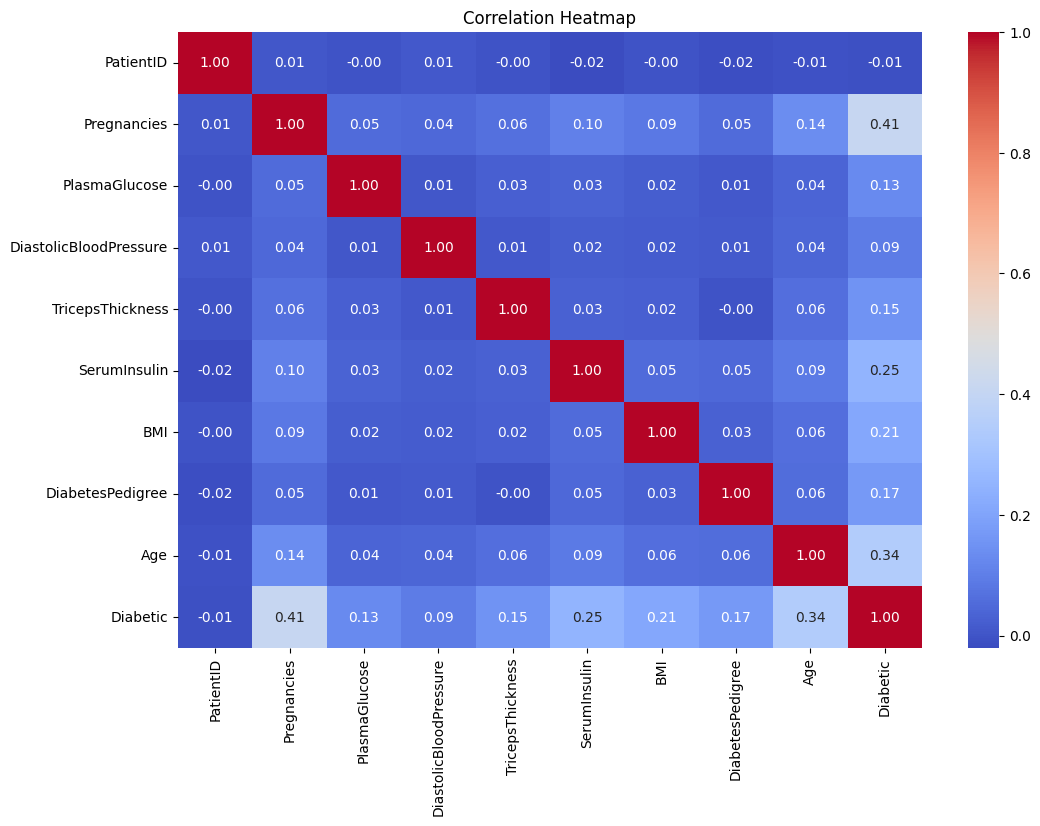

In [12]:
correlation_matrix = data.corr()  # Calculate the correlation matrix
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Create a heatmap
plt.title("Correlation Heatmap")

In [13]:
#define x and y
X = data[['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']] #feature columns
y = data['Diabetic'] #target column

# Split the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 42)

#initialise the mogistic regression model
model = LogisticRegression(max_iter=1000)  # Create a Logistic Regression model

#fit the model to the training data

model.fit(X_train,y_train)

#Make predictions on the test data
y_pred = model.predict(X_test)

#evaluate the model
accuracy = accuracy_score(y_test,y_pred)

conf_matrix= confusion_matrix(y_test,y_pred)
class_report=classification_report(y_test,y_pred)

#print the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")





Accuracy: 0.7893333333333333
Confusion Matrix:
[[1810  204]
 [ 428  558]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      2014
           1       0.73      0.57      0.64       986

    accuracy                           0.79      3000
   macro avg       0.77      0.73      0.74      3000
weighted avg       0.78      0.79      0.78      3000



In [14]:
# create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# train the model
rf_model.fit(X_train, y_train)

#obtain predictions
y_pred = rf_model.predict(X_test)

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.9333333333333333
Confusion Matrix:
[[1941   73]
 [ 127  859]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2014
           1       0.92      0.87      0.90       986

    accuracy                           0.93      3000
   macro avg       0.93      0.92      0.92      3000
weighted avg       0.93      0.93      0.93      3000



In [15]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index=X.columns,
                                   columns=['Importance']).sort_values(by='Importance', ascending=False)
print(feature_importances)


                        Importance
Pregnancies               0.301797
BMI                       0.181901
Age                       0.159865
SerumInsulin              0.115963
PlasmaGlucose             0.094500
TricepsThickness          0.055022
DiastolicBloodPressure    0.048032
DiabetesPedigree          0.042919


As we have seen above, by applying a linear regression model to predict our output target variable resulted in an unbalance between the classes in both Precision and Recall metrics. That is due to an unbalance in the classes in our data set. 
We used a random forest model then on our set to predict the target variable with more consistent results.
Although the metrics score are now better off, we will try to get to a better result by balancing the two classes.

We will now try 2 different procedures:
1 We will perform random Undersampling to do remove some sample data for the majority class in order to balance it with the minority one, and then we will try to apply again our random forest model.
2 Secondly we will explore another technique called SMOOTEN wich is a hybrid sampling technique commonly employed to address the challenge of data imbalance encountered in classification tasks. 
It consists of two main steps:
Firstly, the SMOTE algorithm is applied, which generates synthetic samples for the minority class by interpolating feature vectors between neighboring instances. This augmentation process aims to improve the representation of the minority class and alleviate the class distribution imbalance.
Subsequently, the ENN technique is employed on the combined dataset, involving the identification and removal of noisy and ambiguous instances from both the majority and minority classes. ENN focuses on eliminating samples that are misclassified by their nearest neighbors, thereby enhancing the overall quality and separability of the dataset.


Random undersampling procedure

In [16]:
X = data.drop(columns = ['Diabetic']) #feature columns
y = data ['Diabetic'] #target column

In [17]:
print("orignial class distibution :\n",np.bincount(y))

orignial class distibution :
 [10000  5000]


In [18]:
rus = RandomUnderSampler(random_state=42)
X_resampled,y_resampled = rus.fit_resample(X,y)

In [19]:
print("Resampled class distirbution: \n", np.bincount(y_resampled))

Resampled class distirbution: 
 [5000 5000]


In [20]:
data_resampled_under = pd.concat([X_resampled,y_resampled],axis=1)

In [21]:
data_resampled_under.describe()


,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.500380e+06,3.709200,109.314500,71.745500,29.729600,149.641700,32.197484,0.422577,31.633400,0.500000
std,2.892524e+05,3.406141,31.866131,16.302279,14.765144,139.473299,9.515862,0.397324,12.807537,0.500025
min,1.000038e+06,0.000000,44.000000,24.000000,7.000000,14.000000,18.200807,0.078083,21.000000,0.000000
25%,1.250818e+06,1.000000,87.000000,60.000000,15.000000,44.000000,21.785710,0.139928,22.000000,0.000000
50%,1.500414e+06,3.000000,106.000000,73.000000,31.000000,91.000000,32.189082,0.203834,24.000000,0.500000
75%,1.753021e+06,6.000000,130.000000,85.000000,42.000000,209.000000,39.327763,0.665139,42.000000,1.000000
max,1.999997e+06,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,76.000000,1.000000


C:\Users\marco\AppData\Local\Temp\ipykernel_88132\2799479401.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_resampled_under, x='Diabetic', palette='Set2')  # Visualize the distribution of the target


Text(0.5, 1.0, 'Distribution of the Target Variable (Diabetic)')

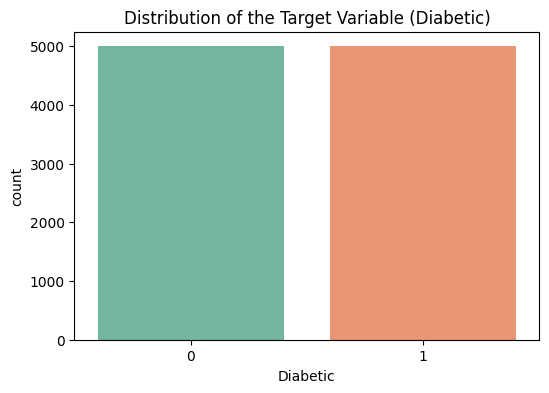

In [22]:
# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=data_resampled_under, x='Diabetic', palette='Set2')  # Visualize the distribution of the target
plt.title("Distribution of the Target Variable (Diabetic)")

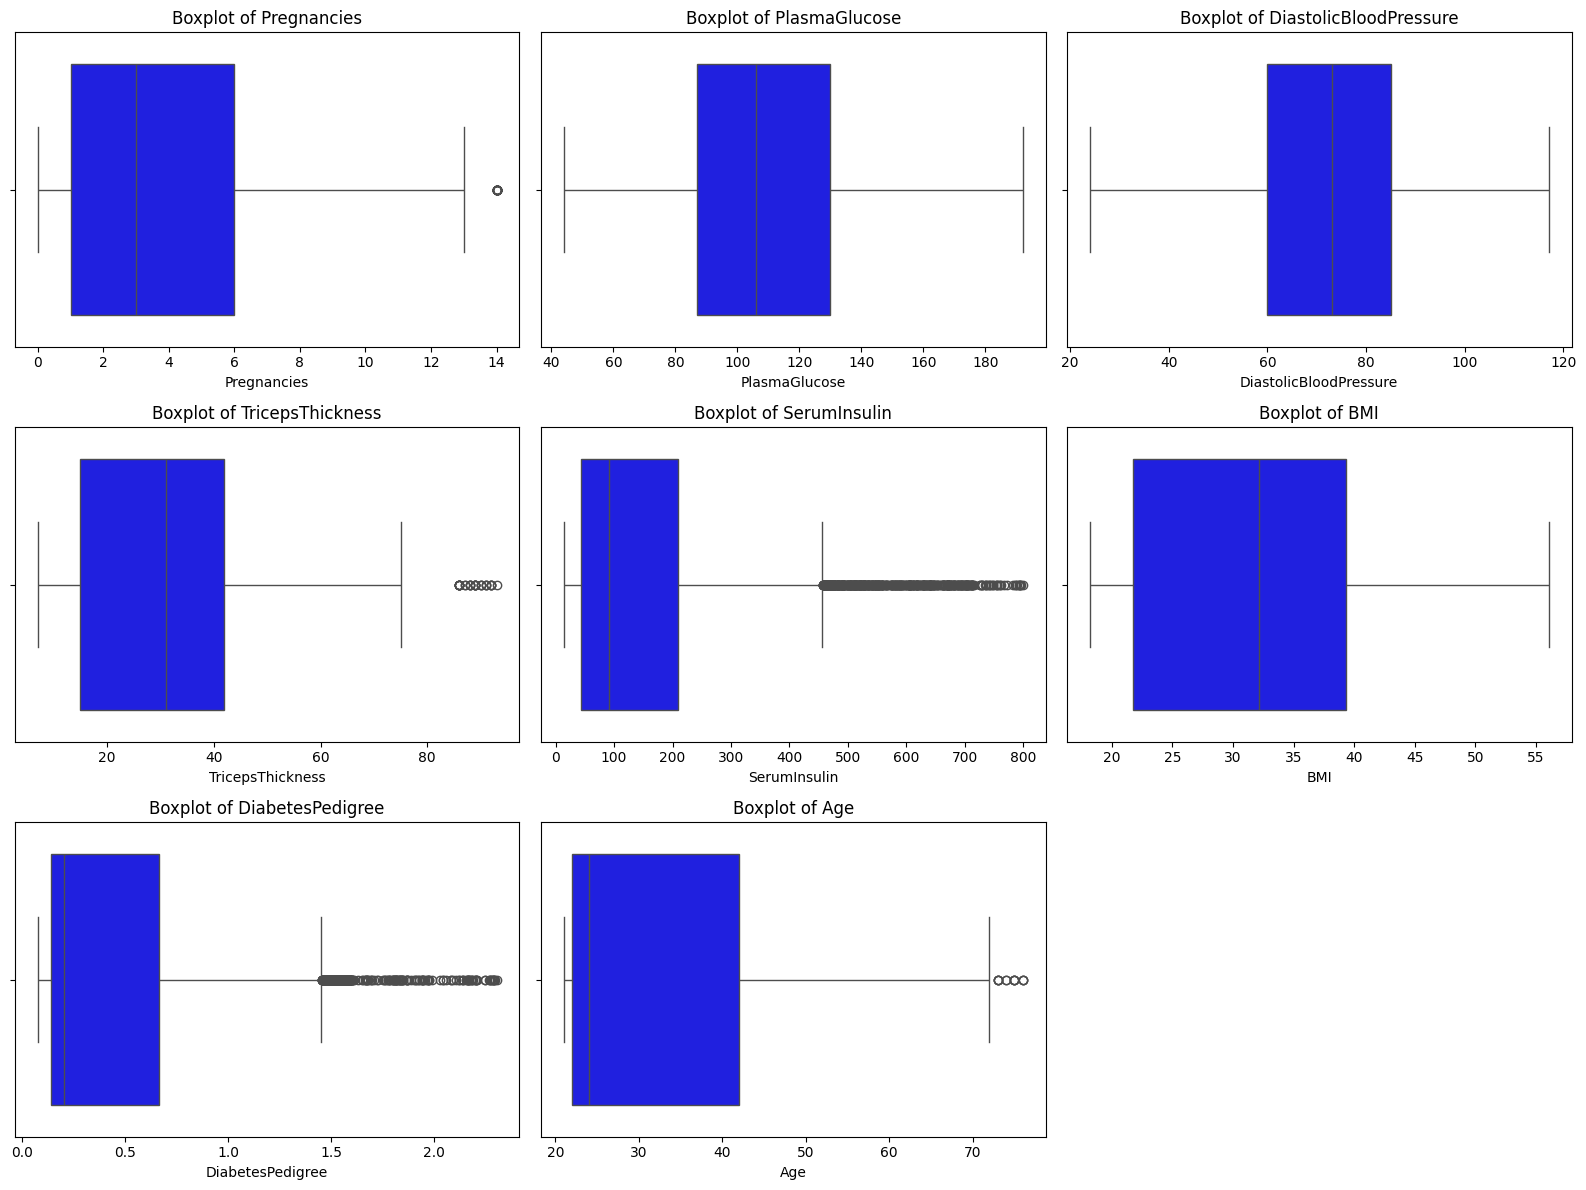

In [23]:
# Plot histograms for numerical features
numerical_features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 
                      'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']

plt.figure(figsize=(16, 12))  # Set the figure size

# Loop through each feature to plot
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)  # Create subplots (3 rows, 3 columns)
    sns.boxplot(data=data_resampled_under,x=feature, color='blue')  # Boxplot for the feature
    plt.title(f"Boxplot of {feature}")
    plt.xlabel(feature)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


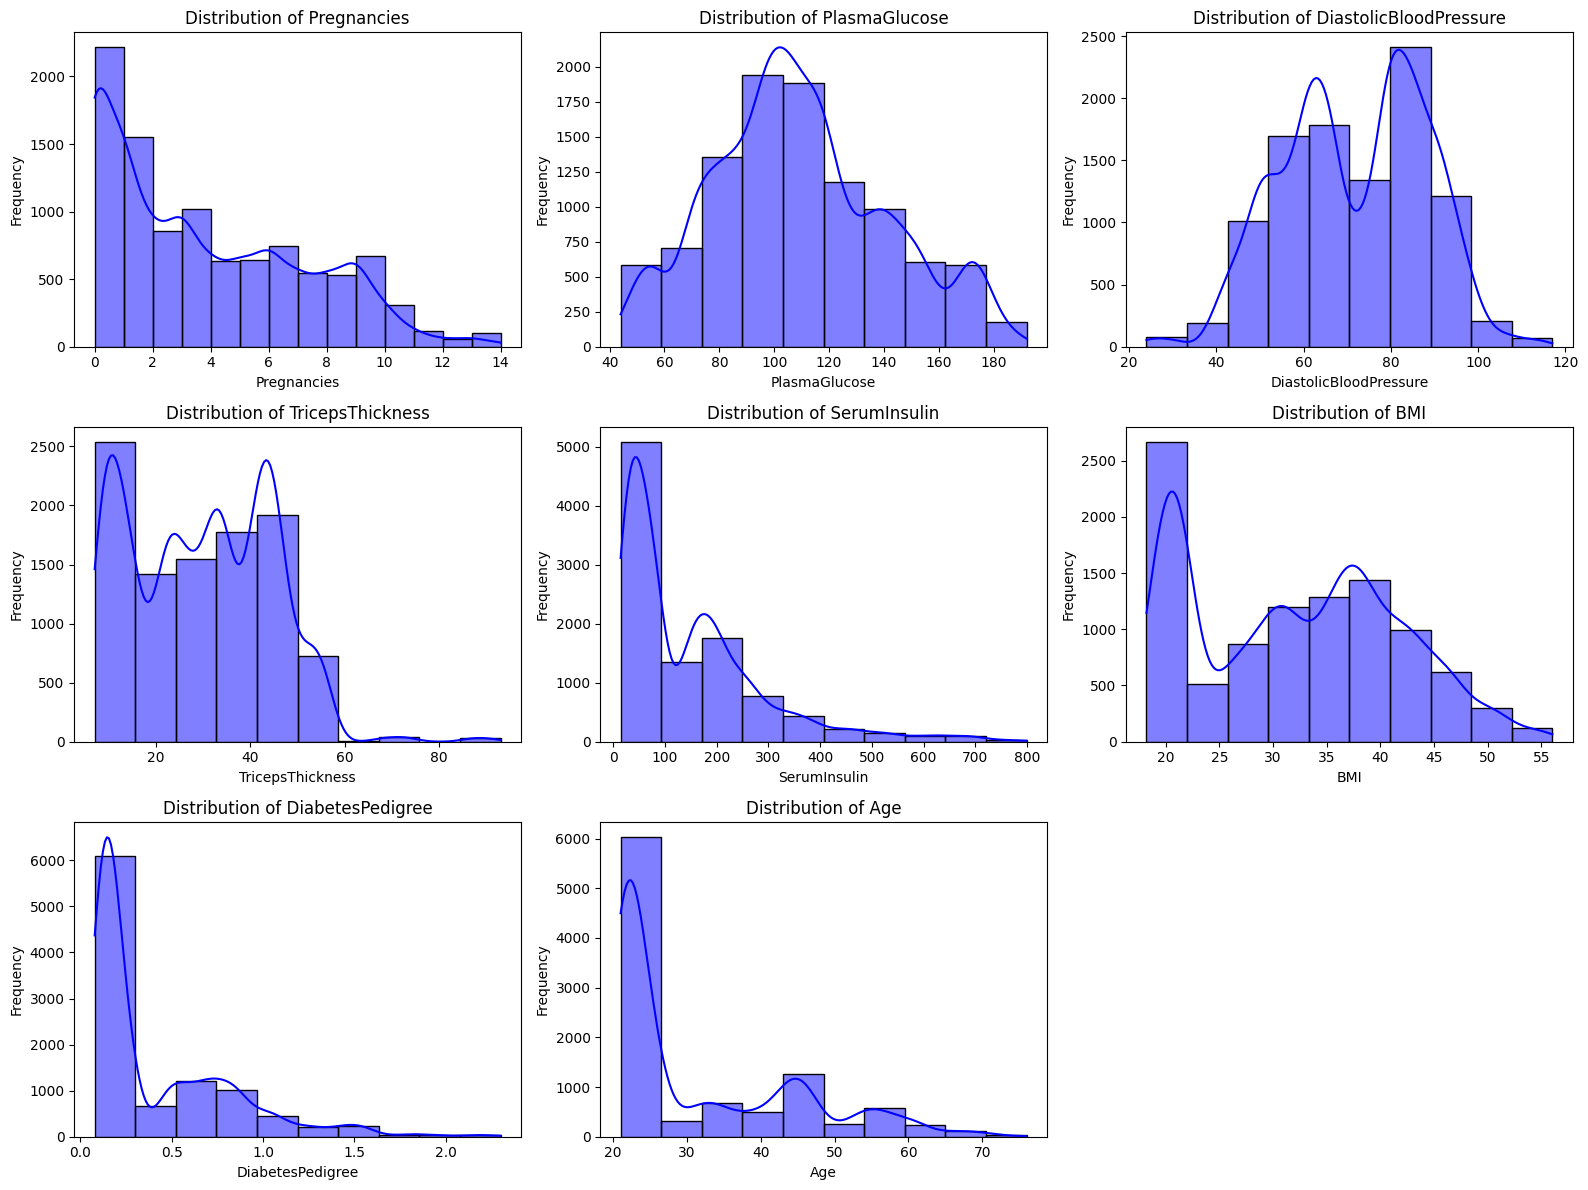

In [24]:
# Plot histograms for numerical features with custom bins
numerical_features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 
                      'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']
nb_bin_feature = [14, 10, 10, 10, 10, 10, 10, 10]  # Custom bin sizes for each feature

plt.figure(figsize=(16, 12))  # Set the figure size

# Loop through each feature and its corresponding bin size
for i, (feature, bins) in enumerate(zip(numerical_features, nb_bin_feature), 1):
    plt.subplot(3, 3, i)  # Create subplots (3 rows, 3 columns)
    sns.histplot(data_resampled_under[feature], kde=True, bins=bins, color='blue')  # Use custom bins
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [25]:
# Split the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state= 42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("classification report:\n",classification_report(y_test, y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))


Accuracy: 0.9315
classification report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      1012
           1       0.92      0.95      0.93       988

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

Confusion Matrix:
 [[925  87]
 [ 50 938]]


Recall and and precision metrics increased as well as f1 score
 

Now we are going to apply the SMOOTEN procedure as our second option.

In [26]:
#SMOTEENN implementation
Xs = data.drop(columns = ['Diabetic']) #feature columns
ys = data ['Diabetic'] #target column

# Create the SMOTEENN object
smote_enn = SMOTEENN(random_state=42)
Xs_resampled, ys_resampled = smote_enn.fit_resample(Xs, ys)

print("Resampled class distribution: \n", np.bincount(ys_resampled))

Resampled class distribution: 
 [2677 3617]


In [27]:
data_resampled_smoteenn = pd.concat([Xs_resampled,ys_resampled],axis=1)


C:\Users\marco\AppData\Local\Temp\ipykernel_88132\3586726863.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_resampled_smoteenn, x='Diabetic', palette='Set2')  # Visualize the distribution of the target


Text(0.5, 1.0, 'Distribution of the Target Variable (Diabetic)')

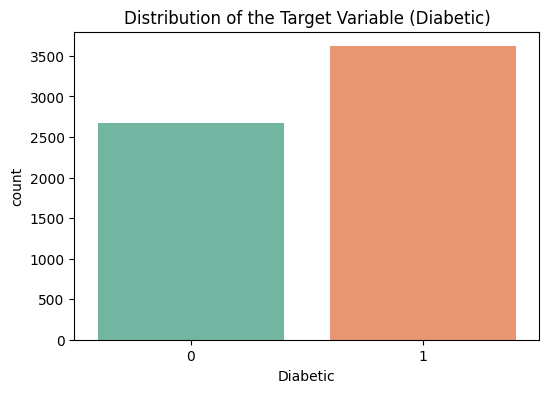

In [28]:
# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=data_resampled_smoteenn, x='Diabetic', palette='Set2')  # Visualize the distribution of the target
plt.title("Distribution of the Target Variable (Diabetic)")

As we can see the balance between the two classe was improoved at the expenses of  a huge part of our set.
That's why we will try a different apporoach by firstly applying the SMOOT ptocedure to oversample and then we will reduce the noise generated through the ENN procedure.

In [29]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
Xsm_resampled, ysm_resampled = smote.fit_resample(Xs, ys)
print("Resampled class distribution: \n", np.bincount(ysm_resampled))

Resampled class distribution: 
 [10000 10000]


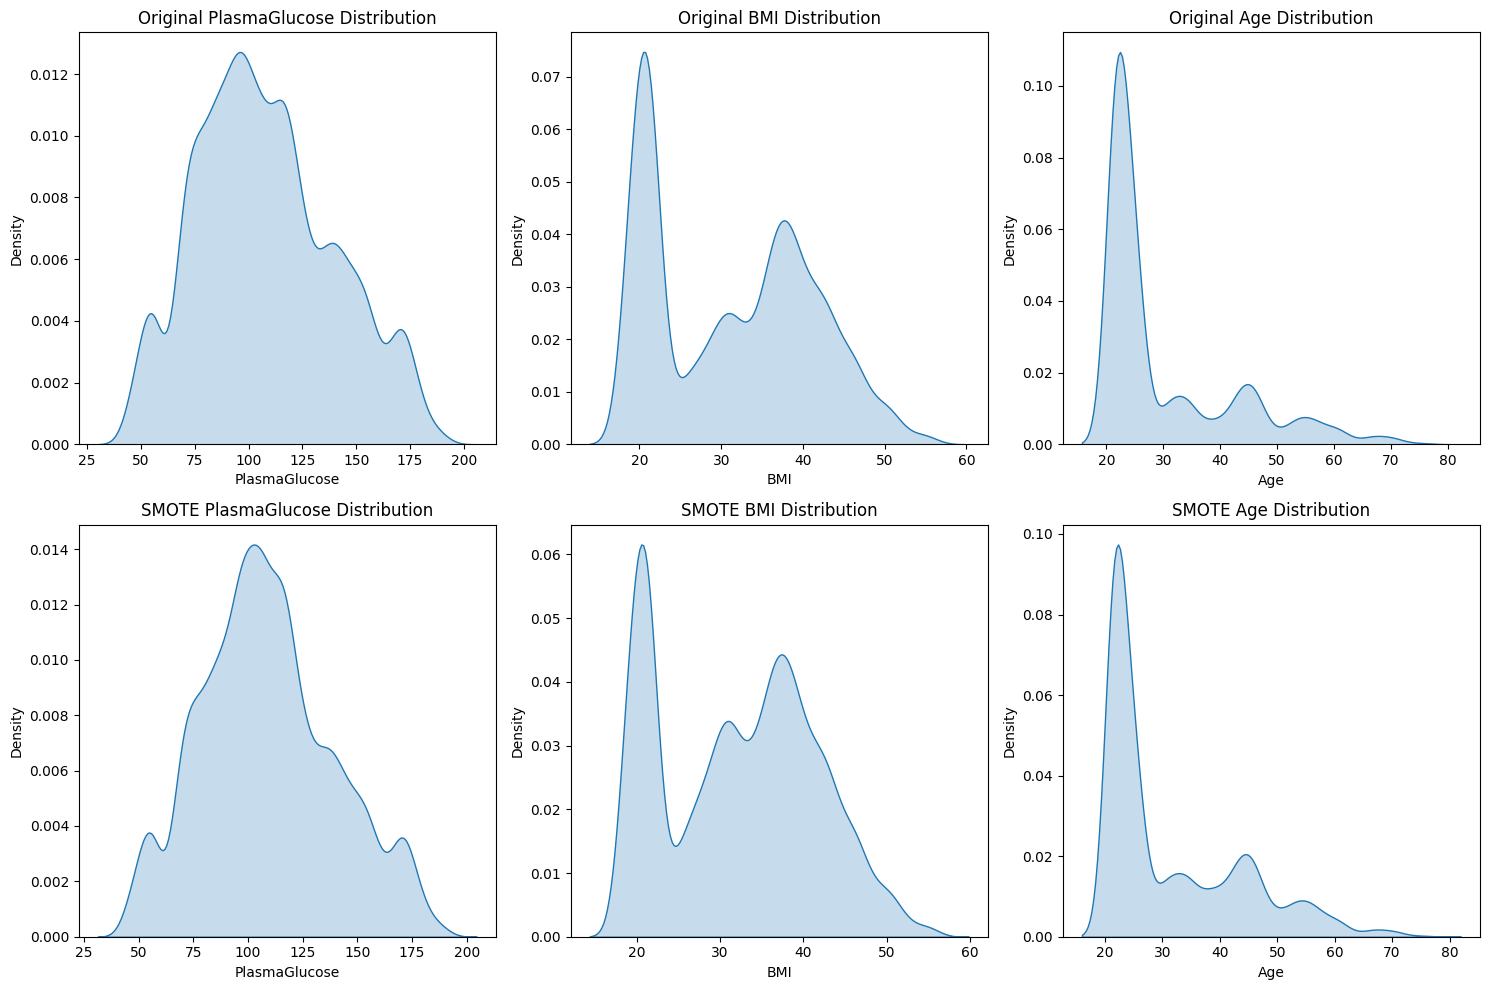

In [30]:
# Plot distributions before and after SMOTE
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

columns_to_check = ['PlasmaGlucose', 'BMI', 'Age']  # Pick a few key numerical features

for i, col in enumerate(columns_to_check):
    sns.kdeplot(Xs[col], label='Original', ax=axes[0, i], fill=True)
    sns.kdeplot(Xsm_resampled[col], label='SMOTE Resampled', ax=axes[1, i], fill=True)
    axes[0, i].set_title(f"Original {col} Distribution")
    axes[1, i].set_title(f"SMOTE {col} Distribution")

plt.tight_layout()
plt.show()


In [31]:
enn = EditedNearestNeighbours(n_neighbors=1)
X_final, y_final = enn.fit_resample(Xsm_resampled, ysm_resampled)
print("Resampled class distribution: \n", np.bincount(y_final))

Resampled class distribution: 
 [10000  7617]


Handling Class Imbalance with SMOTE and ENN
To address the class imbalance in our dataset, we applied SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic samples for the minority class. This initially resulted in a perfectly balanced dataset.

However, to further refine the dataset and remove potential noise, we applied Edited Nearest Neighbors (ENN) as an undersampling technique. The idea behind ENN is to eliminate ambiguous samples that are misclassified by their nearest neighbors.

As observed, the final distribution after ENN is not exactly balanced. Instead of slightly cleaning the data, the minority class has undergone excessive reduction. This suggests that the ENN method may be removing too many instances, possibly due to an overly aggressive setting of n_neighbors.

Next Steps to Improve the Balance
Reduce n_neighbors in ENN should make the undersampling less aggressive.

Test Alternative Undersampling Methods: methods like Tomek Links can be used as a less aggressive cleaning approach, retaining more instances from the minority class.
Verify data quality: before finalizing the resampling, it is important to check whether the removed samples were actually noise or if important instances were eliminated.

In [32]:
tl = TomekLinks()
X_final, y_final = tl.fit_resample(Xsm_resampled, ysm_resampled)

print("Resampled class distribution: \n", np.bincount(y_final))

Resampled class distribution: 
 [10000  8568]


In [33]:
data_resampled_tomek = pd.concat([X_final, y_final], axis=1)

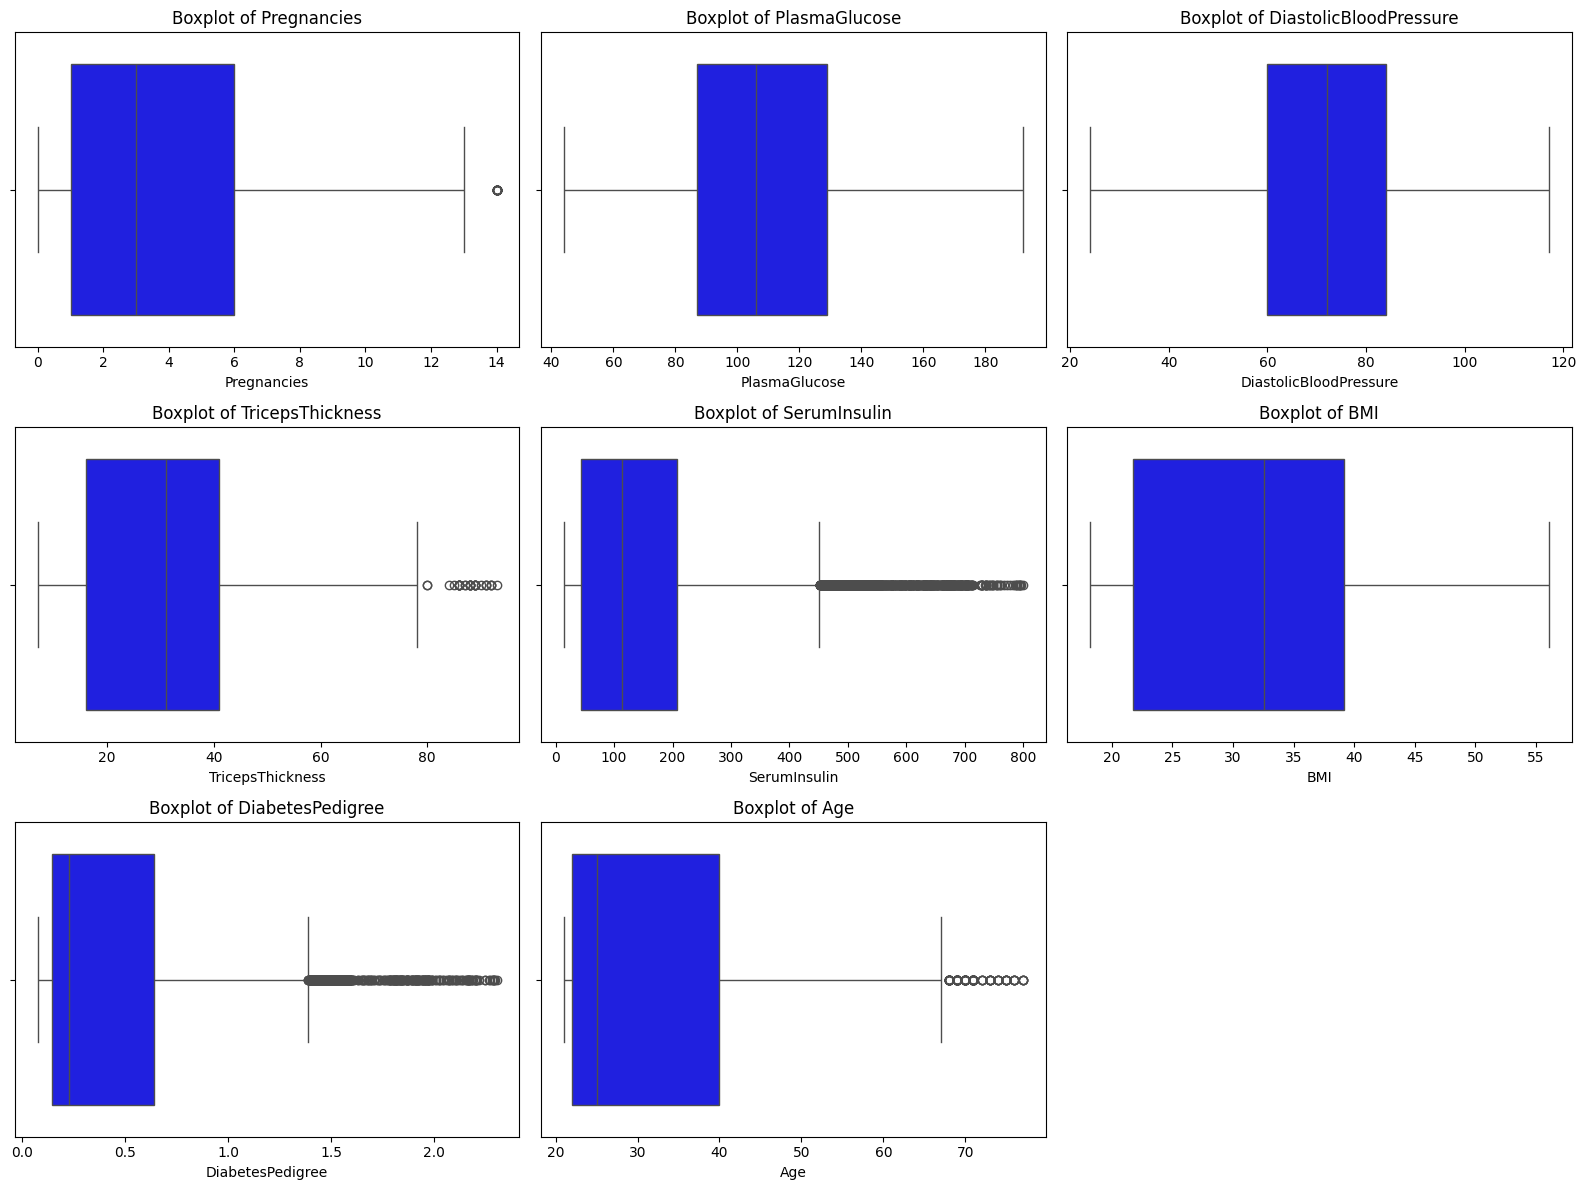

In [34]:
# Plot histograms for numerical features
numerical_features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 
                      'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']

plt.figure(figsize=(16, 12))  # Set the figure size

# Loop through each feature to plot
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)  # Create subplots (3 rows, 3 columns)
    sns.boxplot(data=data_resampled_tomek,x=feature, color='blue')  # Boxplot for the feature
    plt.title(f"Boxplot of {feature}")
    plt.xlabel(feature)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


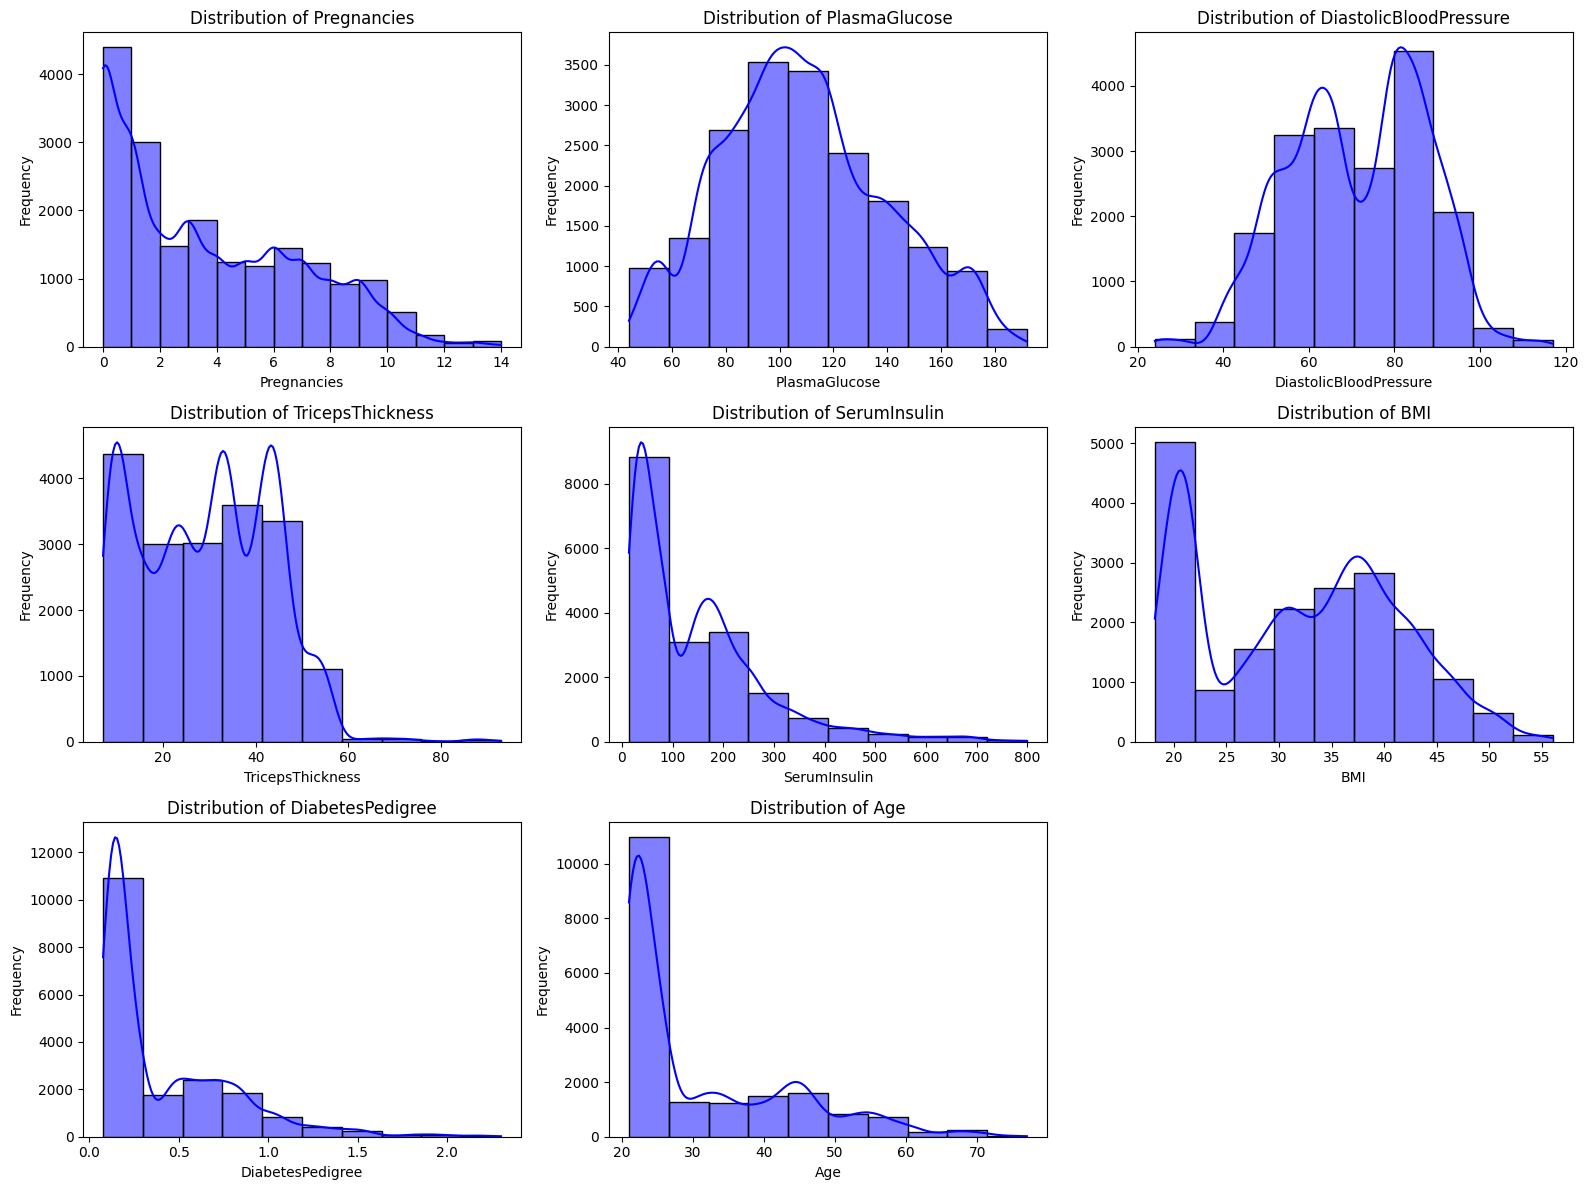

In [35]:
# Plot histograms for numerical features with custom bins
numerical_features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 
                      'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']
nb_bin_feature = [14, 10, 10, 10, 10, 10, 10, 10]  # Custom bin sizes for each feature

plt.figure(figsize=(16, 12))  # Set the figure size

# Loop through each feature and its corresponding bin size
for i, (feature, bins) in enumerate(zip(numerical_features, nb_bin_feature), 1):
    plt.subplot(3, 3, i)  # Create subplots (3 rows, 3 columns)
    sns.histplot(data_resampled_tomek[feature], kde=True, bins=bins, color='blue')  # Use custom bins
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [36]:
X_final.drop(columns=['PatientID'], inplace=True)

In [37]:
X_final.describe()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
count,18568.000000,18568.000000,18568.000000,18568.000000,18568.000000,18568.000000,18568.000000,18568.000000
mean,3.493160,108.837624,71.546532,29.274882,148.716286,32.059682,0.417091,31.197760
std,3.250474,30.835735,15.875101,14.160159,132.874345,9.276110,0.373049,12.027477
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000
25%,1.000000,87.000000,60.000000,16.000000,44.000000,21.756492,0.145807,22.000000
50%,3.000000,106.000000,72.000000,31.000000,113.000000,32.599239,0.231225,25.000000
75%,6.000000,129.000000,84.000000,41.000000,207.000000,39.146580,0.642443,40.000000
max,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000


In [38]:
# Split the resampled dataset
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42
)

print(f"Training size: {len(X_train_resampled)}, Test size: {len(X_test_resampled)}")

#feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_resampled)

Training size: 14854, Test size: 3714


In [39]:
# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_resampled = rf_model.predict(X_test_resampled)

In [40]:
# Compute metrics
accuracy_resampled = accuracy_score(y_test_resampled, y_pred_resampled)
conf_matrix_resampled = confusion_matrix(y_test_resampled, y_pred_resampled)
report_resampled = classification_report(y_test_resampled, y_pred_resampled)

print(f"Accuracy: {accuracy_resampled:.4f}")
print("Confusion Matrix:\n", conf_matrix_resampled)
print("Classification Report:\n", report_resampled)

Accuracy: 0.9338
Confusion Matrix:
 [[1913  130]
 [ 116 1555]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      2043
           1       0.92      0.93      0.93      1671

    accuracy                           0.93      3714
   macro avg       0.93      0.93      0.93      3714
weighted avg       0.93      0.93      0.93      3714



In [41]:
import joblib

# Salva il modello
joblib.dump(rf_model, 'model.pkl')

['model.pkl']